In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
import os
from wordcloud import WordCloud

In [140]:
detail= pd.read_csv(r"A:\input\Jobsdata.csv")
detail.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [141]:
detail.shape

(2253, 16)

In [142]:
detail.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


In [143]:
detail.drop(columns="Unnamed: 0",inplace=True)
detail.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [144]:
detail.insert(2,"Average Salary",0)

#calculating avg salary
def avg_sal(x):
    x = x.replace("(Glassdoor est.)","")
    x = x.replace("$","")
    x = x.replace("K","000")
    if x.find("0-")!=-1:
        avg = (int(x.split("-")[0])+int(x.split("-")[1]))/2
    else:
        avg=0
    return avg

detail["Average Salary"] = detail["Salary Estimate"].apply(avg_sal)

#Max salary per location
max_sal = detail[["Location","Average Salary"]].copy()
max_sal = max_sal.groupby(["Location"]).max()
max_sal = max_sal.reset_index()
max_sal.columns = ["Location", "Max Salary"]


#Max rating per location
max_rat = detail[["Location","Rating"]].copy()
max_rat = max_rat.groupby(["Location"]).max()
max_rat = max_rat.reset_index()
max_rat.columns = ["Location", "Max Rating"]

#Adding to main dataframe
detail= detail.merge(max_sal,on="Location",how="left")
detail =detail.merge(max_rat,on="Location",how="left")

 BEST JOBS BY SALARY AND LOCATION 

In [145]:
best_salary = detail.loc[(detail["Average Salary"]==detail["Max Salary"]),:].copy()
best_salary.sort_values(by=["Location","Average Salary"],ascending=[True,False])

,Job Title,Salary Estimate,Average Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Max Salary,Max Rating
1377,Data Analyst,$41K-$86K (Glassdoor est.),63500.0,Job Description\nGeneral Summary:\n\nThis posi...,4.3,National NeuroMonitoring\n4.3,"Addison, TX","San Antonio, TX",51 to 200 employees,2008,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,-1,63500.0,4.3
509,Data Management Analyst II,$30K-$54K (Glassdoor est.),42000.0,Data Management Analyst II\n\nJob no:\n\nWork ...,3.3,Shands Jacksonville\n3.3,"Alachua, FL","Jacksonville, FL",1001 to 5000 employees,1984,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,-1,42000.0,3.3
2054,Sr. Data Analyst( Healthcare),$47K-$74K (Glassdoor est.),60500.0,Please contact Meera Makam at 925 627 4935 or ...,4.6,Ascent\n4.6,"Alameda, CA","Concord, CA",1001 to 5000 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1,60500.0,4.6
663,SENIOR DATA BI ANALYST,$65K-$81K (Glassdoor est.),73000.0,SUMMARY\n\nThe Senior Data BI Analyst will be ...,2.5,Network Medical Management Inc\n2.5,"Alhambra, CA","Alhambra, CA",501 to 1000 employees,1994,Company - Public,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,-1,73000.0,3.4
1183,Sr. Data Analyst,$50K-$93K (Glassdoor est.),71500.0,"A leading Third Party Claims Administrator, lo...",3.8,"Login Consulting Services, Inc\n3.8","Allegheny West, PA","El Segundo, CA",51 to 200 employees,-1,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1,71500.0,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Music Copyright Data Analyst,$113K-$132K (Glassdoor est.),122500.0,Music Copyright Data Analyst position availabl...,3.3,AppleOne\n3.3,"Woodland Hills, CA","Glendale, CA",1001 to 5000 employees,1964,Company - Private,Staffing & Outsourcing,Business Services,$1 to $2 billion (USD),"Kelly, Manpower",-1,122500.0,4.1
700,"Data Analyst - Health, Senior",$113K-$132K (Glassdoor est.),122500.0,"Data Analysis ? Performs complex research, ana...",4.1,Blue Shield of California\n4.1,"Woodland Hills, CA","Oakland, CA",5001 to 10000 employees,1939,Nonprofit Organization,Insurance Carriers,Insurance,$10+ billion (USD),-1,-1,122500.0,4.1
709,Copyright Data Analyst,$113K-$132K (Glassdoor est.),122500.0,Join a Growing Music licensing company in Wood...,3.3,AppleOne\n3.3,"Woodland Hills, CA","Glendale, CA",1001 to 5000 employees,1964,Company - Private,Staffing & Outsourcing,Business Services,$1 to $2 billion (USD),"Kelly, Manpower",-1,122500.0,4.1
752,Manufacturing Data Analyst,$73K-$82K (Glassdoor est.),77500.0,WestRock is currently seeking a Manufacturing ...,3.2,MeadWestVaco\n3.2,"Woodridge, IL","Atlanta, GA",10000+ employees,2015,Company - Public,Miscellaneous Manufacturing,Manufacturing,$10+ billion (USD),"International Paper, Graphic Packaging Interna...",-1,77500.0,4.8


# best jobs with rating and location

In [163]:
best_rating = detail.loc[(detail["Rating"]==detail["Max Rating"]),:].copy()
best_rating.sort_values(by=["Location","Rating"],ascending=[True,False])

,Job Title,Salary Estimate,Average Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Max Salary,Max Rating,Max_revenue
1377,Data Analyst,$41K-$86K (Glassdoor est.),63500.0,Job Description\nGeneral Summary:\n\nThis posi...,4.3,National NeuroMonitoring\n4.3,"Addison, TX","San Antonio, TX",51 to 200 employees,2008,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,True,63500.0,4.3,0.0
509,Data Management Analyst II,$30K-$54K (Glassdoor est.),42000.0,Data Management Analyst II\n\nJob no:\n\nWork ...,3.3,Shands Jacksonville\n3.3,"Alachua, FL","Jacksonville, FL",1001 to 5000 employees,1984,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,True,42000.0,3.3,1000.0
2054,Sr. Data Analyst( Healthcare),$47K-$74K (Glassdoor est.),60500.0,Please contact Meera Makam at 925 627 4935 or ...,4.6,Ascent\n4.6,"Alameda, CA","Concord, CA",1001 to 5000 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,True,60500.0,4.6,500.0
614,Senior Data Bi Analyst,$35K-$45K (Glassdoor est.),40000.0,SUMMARYThe Senior Data BI Analyst will be resp...,3.4,"Apollo Medical Holdings, Inc.\n3.4","Alhambra, CA","Sandy, UT",1 to 50 employees,-1,Company - Private,-1,-1,Less than $1 million (USD),-1,True,73000.0,3.4,1.0
1127,Data Analyst,$37K-$44K (Glassdoor est.),40500.0,"A leading Third Party Claims Administrator, lo...",3.8,"Login Consulting Services, Inc\n3.8","Allegheny West, PA","El Segundo, CA",51 to 200 employees,-1,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,True,71500.0,3.8,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,Clinical Data Designer (Sr. SDTM Programmer/An...,$48K-$96K (Glassdoor est.),72000.0,Update 10.18.18 Willing to assist with relocat...,2.5,"Avacend, Inc.\n2.5","Woodcliff Lake, NJ","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,True,72000.0,2.5,0.0
668,"Data Analyst - Health, Experienced",$65K-$81K (Glassdoor est.),73000.0,"Data Analysis:\nPerforms complex research, ana...",4.1,Blue Shield of California\n4.1,"Woodland Hills, CA","Oakland, CA",5001 to 10000 employees,1939,Nonprofit Organization,Insurance Carriers,Insurance,$10+ billion (USD),-1,True,122500.0,4.1,10000.0
700,"Data Analyst - Health, Senior",$113K-$132K (Glassdoor est.),122500.0,"Data Analysis ? Performs complex research, ana...",4.1,Blue Shield of California\n4.1,"Woodland Hills, CA","Oakland, CA",5001 to 10000 employees,1939,Nonprofit Organization,Insurance Carriers,Insurance,$10+ billion (USD),-1,True,122500.0,4.1,10000.0
822,"Manufacturing Data Analyst - Woodridge, IL",$42K-$76K (Glassdoor est.),59000.0,About WestRock\nWestRock (NYSE: WRK) partners ...,4.8,Ongig\n4.8,"Woodridge, IL","San Francisco, CA",1 to 50 employees,2011,Company - Private,Enterprise Software & Network Solutions,Information Technology,Less than $1 million (USD),-1,True,77500.0,4.8,1.0


best jobs with rating and salary

In [146]:
best_salary_rating = detail.loc[(detail["Average Salary"]==detail["Max Salary"]) & (detail["Rating"]==detail["Max Rating"]),:].copy()
best_salary_rating.sort_values(by=["Location","Rating","Average Salary"],ascending=[True,False,False])

,Job Title,Salary Estimate,Average Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Max Salary,Max Rating
1377,Data Analyst,$41K-$86K (Glassdoor est.),63500.0,Job Description\nGeneral Summary:\n\nThis posi...,4.3,National NeuroMonitoring\n4.3,"Addison, TX","San Antonio, TX",51 to 200 employees,2008,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,-1,63500.0,4.3
509,Data Management Analyst II,$30K-$54K (Glassdoor est.),42000.0,Data Management Analyst II\n\nJob no:\n\nWork ...,3.3,Shands Jacksonville\n3.3,"Alachua, FL","Jacksonville, FL",1001 to 5000 employees,1984,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,-1,42000.0,3.3
2054,Sr. Data Analyst( Healthcare),$47K-$74K (Glassdoor est.),60500.0,Please contact Meera Makam at 925 627 4935 or ...,4.6,Ascent\n4.6,"Alameda, CA","Concord, CA",1001 to 5000 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1,60500.0,4.6
1183,Sr. Data Analyst,$50K-$93K (Glassdoor est.),71500.0,"A leading Third Party Claims Administrator, lo...",3.8,"Login Consulting Services, Inc\n3.8","Allegheny West, PA","El Segundo, CA",51 to 200 employees,-1,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1,71500.0,3.8
443,Data Analyst - W2 candidate,$26K-$47K (Glassdoor est.),36500.0,Job Description\nCompany Description\n\nClient...,3.3,ClientSolv Technologies\n3.3,"American Fork, UT","Greenwood Village, CO",51 to 200 employees,1994,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1,36500.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,Data Analyst Junior,$50K-$93K (Glassdoor est.),71500.0,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Wilmington, DE","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,71500.0,5.0
373,"Senior Business Analyst, Data Management",$98K-$114K (Glassdoor est.),106000.0,"The Senior Business Analyst, Data Management w...",3.4,Plymouth Rock Assurance\n3.4,"Woodbridge, NJ","Boston, MA",1001 to 5000 employees,1982,Company - Private,Insurance Carriers,Insurance,$10 to $25 million (USD),"Arbella Insurance, Safety Insurance",-1,106000.0,3.4
414,Clinical Data Designer (Sr. SDTM Programmer/An...,$48K-$96K (Glassdoor est.),72000.0,Update 10.18.18 Willing to assist with relocat...,2.5,"Avacend, Inc.\n2.5","Woodcliff Lake, NJ","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,72000.0,2.5
700,"Data Analyst - Health, Senior",$113K-$132K (Glassdoor est.),122500.0,"Data Analysis ? Performs complex research, ana...",4.1,Blue Shield of California\n4.1,"Woodland Hills, CA","Oakland, CA",5001 to 10000 employees,1939,Nonprofit Organization,Insurance Carriers,Insurance,$10+ billion (USD),-1,-1,122500.0,4.1


In [147]:
best_salary_rating = detail.loc[(detail["Average Salary"]==detail["Max Salary"]) & (detail["Rating"]==detail["Max Rating"]),:].copy()
best_salary_rating.sort_values(by=["Location","Rating","Average Salary"],ascending=[True,False,False])

,Job Title,Salary Estimate,Average Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Max Salary,Max Rating
1377,Data Analyst,$41K-$86K (Glassdoor est.),63500.0,Job Description\nGeneral Summary:\n\nThis posi...,4.3,National NeuroMonitoring\n4.3,"Addison, TX","San Antonio, TX",51 to 200 employees,2008,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,-1,63500.0,4.3
509,Data Management Analyst II,$30K-$54K (Glassdoor est.),42000.0,Data Management Analyst II\n\nJob no:\n\nWork ...,3.3,Shands Jacksonville\n3.3,"Alachua, FL","Jacksonville, FL",1001 to 5000 employees,1984,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,-1,42000.0,3.3
2054,Sr. Data Analyst( Healthcare),$47K-$74K (Glassdoor est.),60500.0,Please contact Meera Makam at 925 627 4935 or ...,4.6,Ascent\n4.6,"Alameda, CA","Concord, CA",1001 to 5000 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1,60500.0,4.6
1183,Sr. Data Analyst,$50K-$93K (Glassdoor est.),71500.0,"A leading Third Party Claims Administrator, lo...",3.8,"Login Consulting Services, Inc\n3.8","Allegheny West, PA","El Segundo, CA",51 to 200 employees,-1,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1,71500.0,3.8
443,Data Analyst - W2 candidate,$26K-$47K (Glassdoor est.),36500.0,Job Description\nCompany Description\n\nClient...,3.3,ClientSolv Technologies\n3.3,"American Fork, UT","Greenwood Village, CO",51 to 200 employees,1994,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1,36500.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,Data Analyst Junior,$50K-$93K (Glassdoor est.),71500.0,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Wilmington, DE","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,71500.0,5.0
373,"Senior Business Analyst, Data Management",$98K-$114K (Glassdoor est.),106000.0,"The Senior Business Analyst, Data Management w...",3.4,Plymouth Rock Assurance\n3.4,"Woodbridge, NJ","Boston, MA",1001 to 5000 employees,1982,Company - Private,Insurance Carriers,Insurance,$10 to $25 million (USD),"Arbella Insurance, Safety Insurance",-1,106000.0,3.4
414,Clinical Data Designer (Sr. SDTM Programmer/An...,$48K-$96K (Glassdoor est.),72000.0,Update 10.18.18 Willing to assist with relocat...,2.5,"Avacend, Inc.\n2.5","Woodcliff Lake, NJ","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,72000.0,2.5
700,"Data Analyst - Health, Senior",$113K-$132K (Glassdoor est.),122500.0,"Data Analysis ? Performs complex research, ana...",4.1,Blue Shield of California\n4.1,"Woodland Hills, CA","Oakland, CA",5001 to 10000 employees,1939,Nonprofit Organization,Insurance Carriers,Insurance,$10+ billion (USD),-1,-1,122500.0,4.1


Max_Revenue

In [148]:
def filter_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000
    return revenue
        
detail['Max_revenue']=detail['Revenue'].apply

In [149]:
detail['Max_revenue']=detail['Revenue'].apply(lambda x: filter_revenue(x))

In [150]:
df=detail.groupby('Sector')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [151]:
df.reset_index(inplace=True)

In [152]:
df

,Sector,Max_revenue
0,Insurance,5465.196078
1,Mining & Metals,5000.000000
2,Aerospace & Defense,4884.090909
3,Telecommunications,4778.181818
4,Finance,4653.881657
5,Retail,4447.394737
6,Manufacturing,4382.625000
7,Media,3837.880952
8,Transportation & Logistics,3080.000000
9,Biotech & Pharmaceuticals,2835.636364


In [ ]:
  OPENINGS

In [153]:
detail['Easy Apply']=detail['Easy Apply'].fillna(False).astype('bool')

In [154]:
df_easy_apply=detail[detail['Easy Apply']==True]
df=df_easy_apply.groupby('Company Name')['Easy Apply'].count().reset_index()
company_opening_df=df.sort_values('Easy Apply',ascending=False).head(10)

In [155]:
df=pd.DataFrame(detail[detail['Easy Apply']==True]['Job Title'].value_counts()).rename(columns={'Job Title':'No_of_openings'})

In [156]:
df=df.reset_index().rename(columns={'index':'Job Title'})

In [157]:
df=df.head(10)

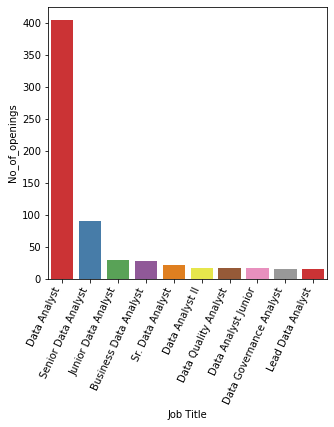

In [158]:
plt.figure(figsize=(5,5))
chart = sns.barplot(
    data=df,
    x='Job Title',
    y='No_of_openings',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)

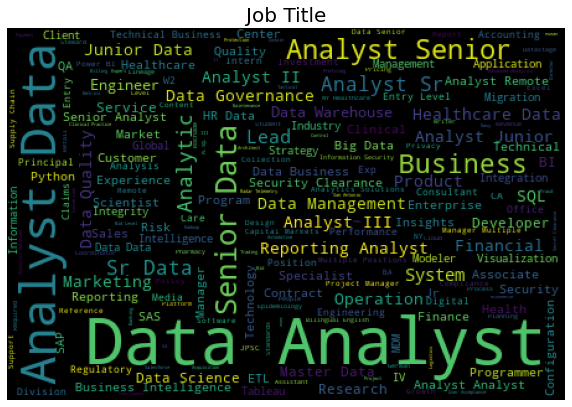

In [180]:
job_title=detail['Job Title'][~pd.isnull(detail['Job Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(job_title))
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title(detail['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

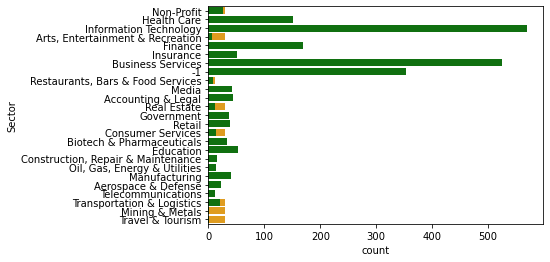

In [185]:
sns.countplot(y=detail['Salary Estimate'], color='orange')
sns.countplot(y=detail['Sector'], color='green')

In [183]:
labels = detail['Salary Estimate'].value_counts()[:15].index
values = detail['Salary Estimate'].value_counts()[:15].values

plt.figure(figsize=(10,10))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label', values=values)])
fig.show()

<Figure size 720x720 with 0 Axes>

Industry

In [193]:
labels = detail['Industry'].value_counts()[:15].index
values = detail['Industry'].value_counts()[:15].values
plt.figure(figsize=(1,1))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()
labels = detail['Location'].value_counts()[:15].index
values = detail['Location'].value_counts()[:15].values

plt.figure(figsize=(1,1))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()


<Figure size 72x72 with 0 Axes>

<Figure size 72x72 with 0 Axes>